In [1]:
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 200

In [2]:
%matplotlib inline

cols = ['MSFT', 'MU', 'INTC']

df = pd.read_csv('decisecond.csv', index_col=0, parse_dates=True)
y = df[cols]
y = y[cols].values

Preparing for an Unmeasured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 6.294 Seconds
Building M ...
	Done. Took 7.366 Seconds
Building yhat ...
	Done. Took 0.001 Seconds
Running Least Squares to get xhat ...
	Finished lsq: Error = 3.513
	Done. Took 90.367 Seconds
Extracting Qis ...
	Done. Took 0.001 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2) MSFT <-- MU: 0.459*(0.301)^t + 5.795*(0.027)^t + -3.785*(-0.092)^t + 2.303*(0.021)^t + -4.771364 * delta(t,0)
		RMSE = 0.004
		Matlab: [ 0.46  0.3   5.79  0.03 -3.79 -0.09  2.3   0.02]
	Done. Took 62.390 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3) MSFT <-- INTC: 4.358*(0.020)^t + 4.266*(0.019)^t + -2.582*(-0.041)^t + -8.712*(-0.040)^t + 2.670887 * delta(t,0)
		RMSE = 0.004
		Matlab: [ 4.36  0.02  4.27  0.02 -2.58 -0.04 -8.71 -0.04]
	Done. Took 18.257 Seconds
Learning Convolution for Q(2,1) ...
	Q(2,1) MU <-- MSFT: 0.089*(0.430)^t + -9.460*(-0.035)^t + 1.782*(0.091)^t + -0.106*(0.776)^t + 7.694664 * del

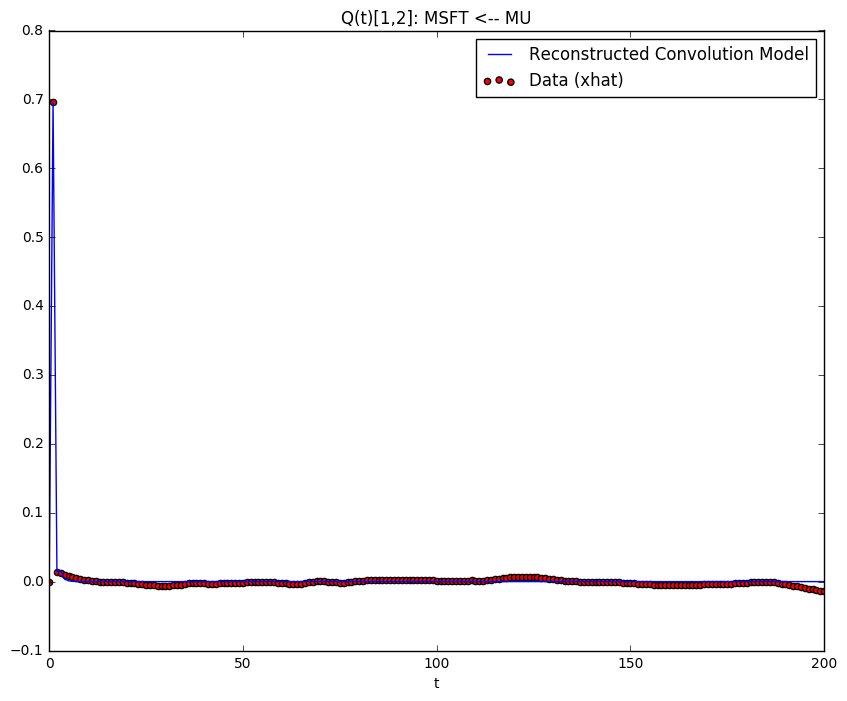

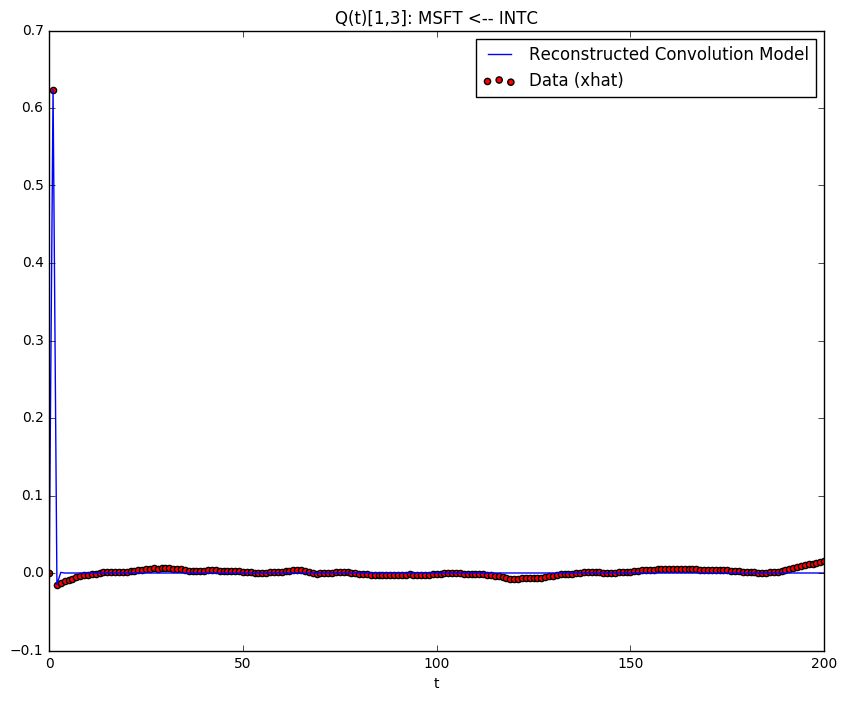

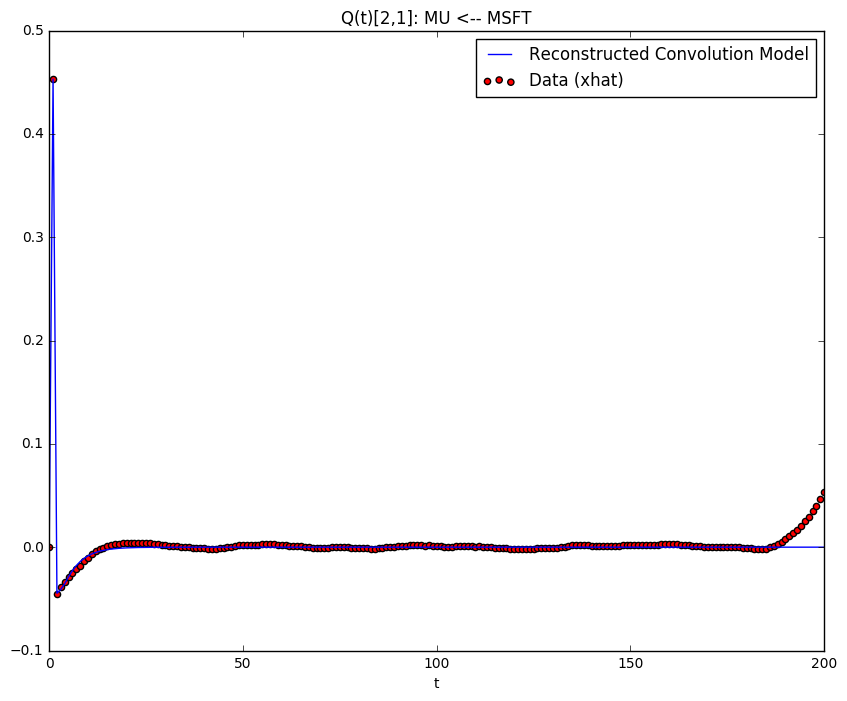

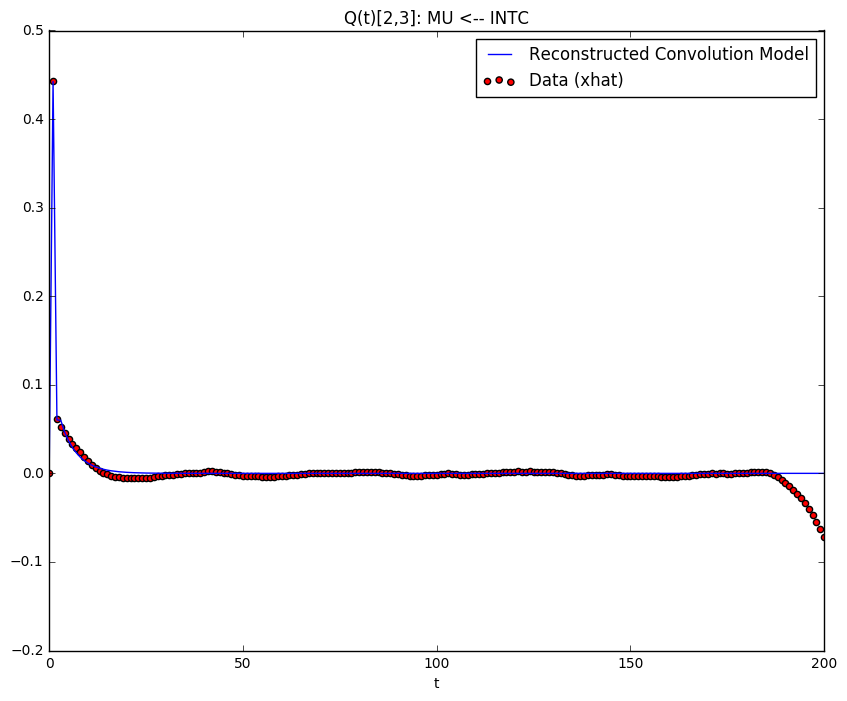

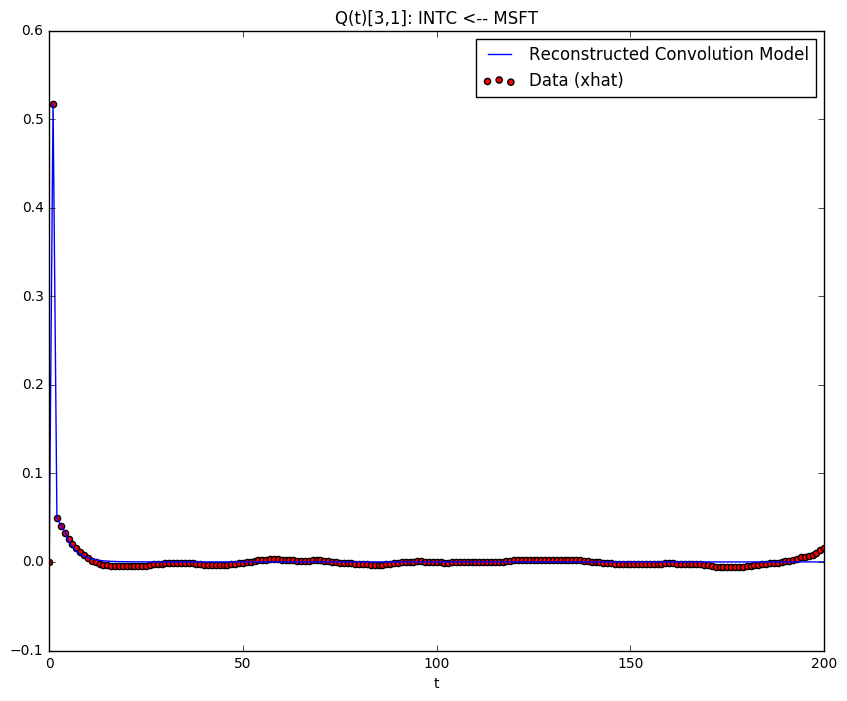

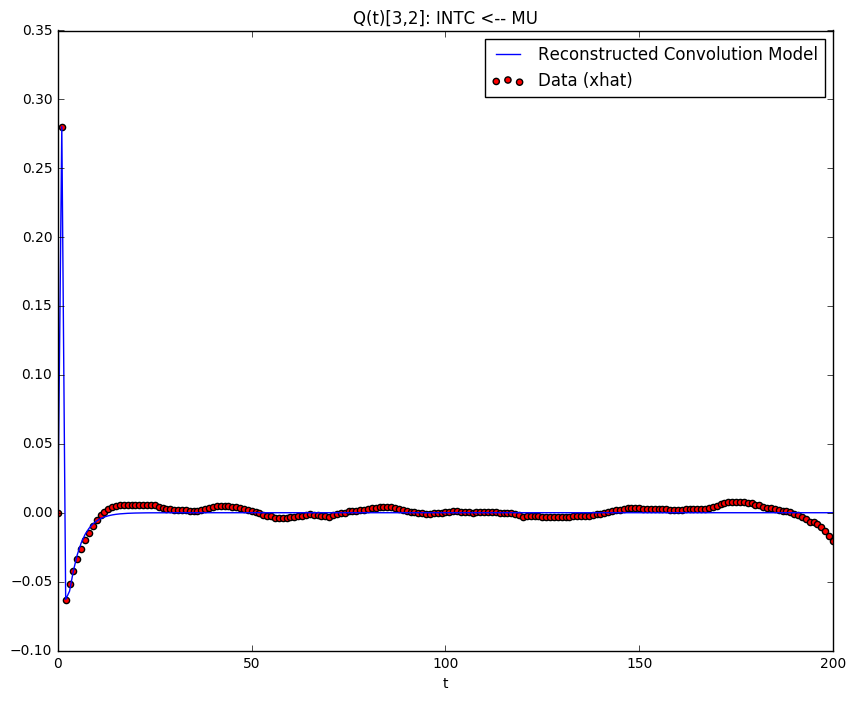

In [3]:
titles = {i + 1: sec for i, sec in enumerate(cols)}

recon = Reconstructor(debug=True, r=R, max_iterations=1000, bounds=10, order=4, robust=False)
rs = recon.unmeasured(y, plot=True, titles=titles)

flat = []
for key, vals in rs.items():
    for k2, lst in vals.items():
        flat.append(list(lst))

In [4]:
subs = [' '.join([str(item) for item in sub]) for sub in flat]
arr = ' ; '.join(subs)
colstrs = ['\'{}\''.format(item) for item in cols]
print('vulnerabilities([{}], {{{}}});'.format(arr, ', '.join(colstrs)))

vulnerabilities([0.459027076898 0.300756356373 5.7948997568 0.0274833508943 -3.78547044842 -0.0922383725037 2.30290720989 0.0213145135814 ; 4.35780994461 0.0204773555447 4.26589449423 0.019119495602 -2.58246492045 -0.0410647487865 -8.71212684107 -0.0398106691854 ; 0.0893105320075 0.43008780752 -9.45995231197 -0.0353895684114 1.78215686376 0.0909773411609 -0.106178821524 0.776436184503 ; -5.36967700534 -0.0546155459774 -0.438629413988 -0.0581333535509 0.116539666882 0.793908753916 0.22103127243 0.140639529314 ; -3.05431458201 -0.0414032979228 1.6897431073 -0.196141841232 -5.46655443653 -0.116023875179 0.12192182454 0.721646257949 ; 8.94430015994 0.0343561973462 -0.156316260807 0.720875053356 0.244763796581 0.172627992361 4.43819934408 0.00976077465567], {'MSFT', 'MU', 'INTC'});


Preparing for an Unmeasured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 6.472 Seconds
Building M ...
	Done. Took 6.481 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished in 6 iterations
	Done. Took 1.175 Seconds
Extracting Qis ...
	Done. Took 0.001 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2) MSFT <-- MU: -0.465*(0.003)^t + -0.001*(-0.019)^t + 0.544*(0.002)^t + 0.004*(0.002)^t + -0.081685 * delta(t,0)
		RMSE = 0.000
		Matlab: [-0.46  0.   -0.   -0.02  0.54  0.    0.    0.  ]
	Done. Took 89.418 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3) MSFT <-- INTC: 1.034*(0.026)^t + 0.110*(-0.151)^t + 5.190*(0.026)^t + -3.710*(-0.042)^t + -2.623861 * delta(t,0)
		RMSE = 0.000
		Matlab: [ 1.03  0.03  0.11 -0.15  5.19  0.03 -3.71 -0.04]
	Done. Took 68.618 Seconds
Learning Convolution for Q(2,1) ...
	Q(2,1) MU <-- MSFT: 0.085*(0.003)^t + 1.972*(-0.001)^t + 0.003*(-0.000)^t + -1.756*(-0.001)^t + -0.303199 * delt

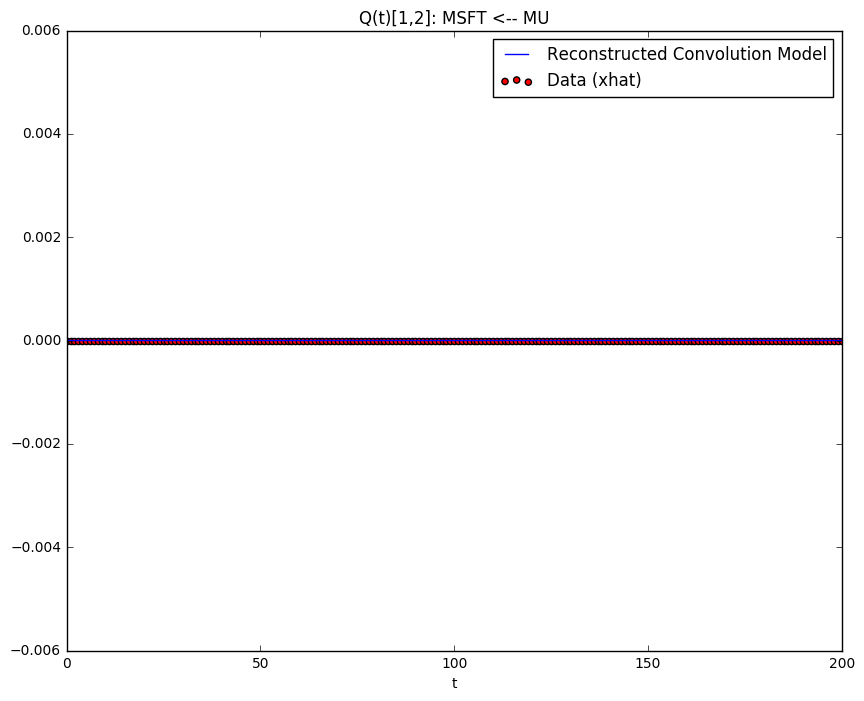

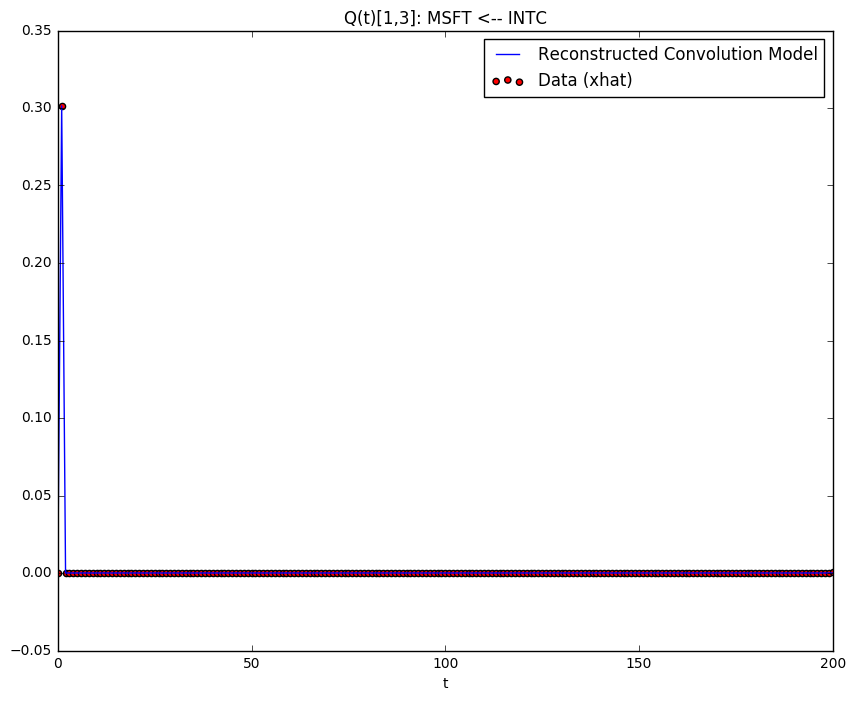

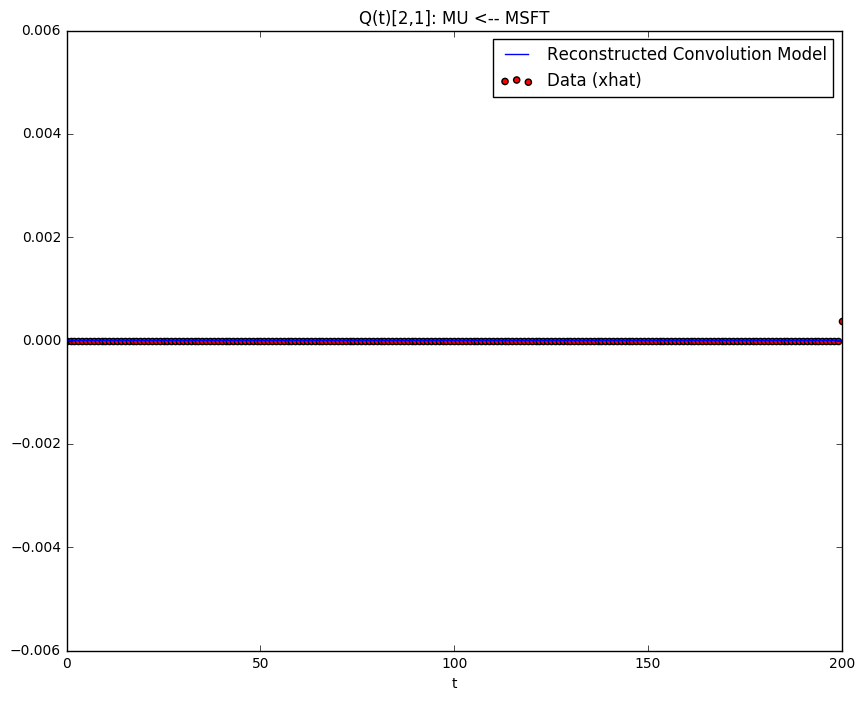

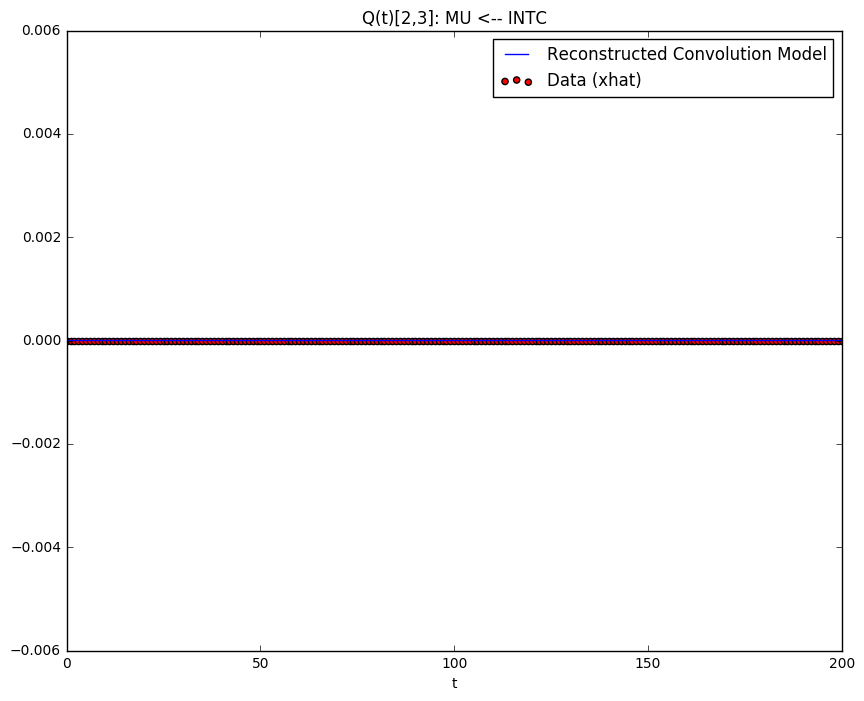

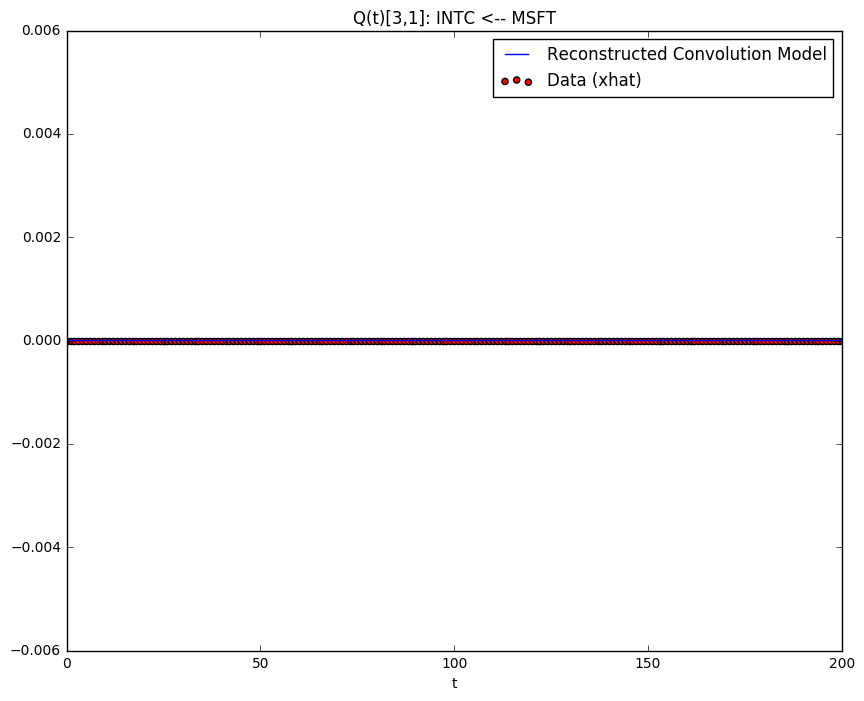

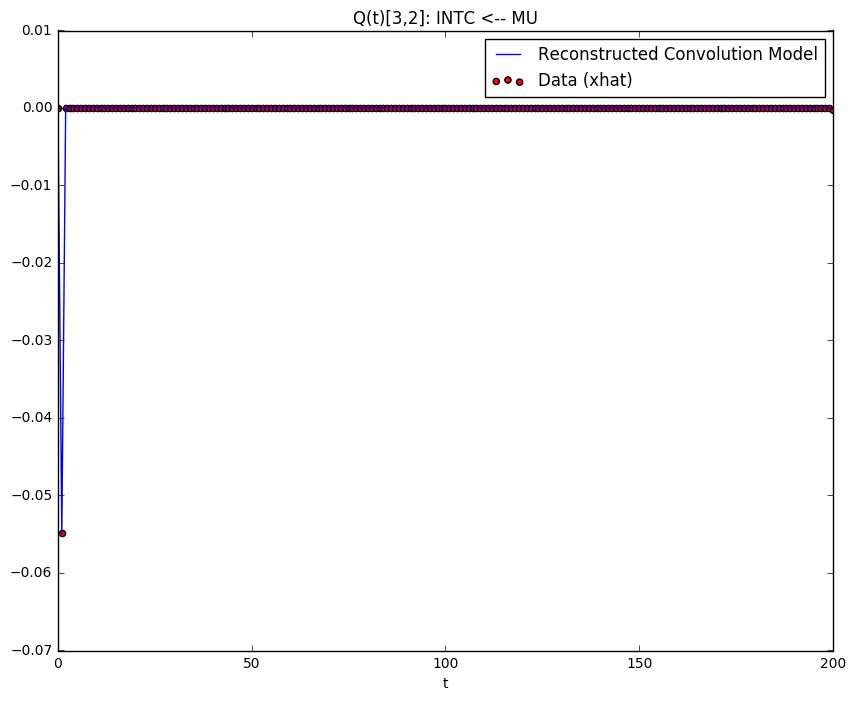

In [5]:
titles = {i + 1: sec for i, sec in enumerate(cols)}

recon = Reconstructor(debug=True, r=R, max_iterations=1000, bounds=10, order=4, robust=True)
rs = recon.unmeasured(y, plot=True, titles=titles)

flat = []
for key, vals in rs.items():
    for k2, lst in vals.items():
        flat.append(list(lst))

In [6]:
subs = [' '.join([str(item) for item in sub]) for sub in flat]
arr = ' ; '.join(subs)
colstrs = ['\'{}\''.format(item) for item in cols]
print('vulnerabilities([{}], {{{}}});'.format(arr, ', '.join(colstrs)))

vulnerabilities([-0.464898065202 0.00259531594235 -0.00102337693119 -0.0193884737357 0.543981735884 0.00216957052662 0.00362438099874 0.00179743516397 ; 1.03382460812 0.0260025672032 0.109773317232 -0.151094987602 5.18980053722 0.0257961639064 -3.70953698273 -0.0423786169471 ; 0.0847513325486 0.00332740636816 1.9717161228 -0.00102366655572 0.00292826787056 -0.000252130397043 -1.75619702645 -0.00098913561254 ; 0.0140173639824 0.00524458291968 0.122714545102 0.000884500219702 -0.026926025095 -0.00687585852892 -0.105602396632 0.00347716507511 ; -0.303659212902 0.00827361680356 1.53952564243 0.0100735045977 0.297072231773 -0.00171700578463 -1.16376597609 0.0107289895991 ; 1.33985824067 -0.00541449395571 -0.0726300770178 -0.0214693855385 -1.04601009852 0.0169288387162 3.3094094505 -0.00951713505688], {'MSFT', 'MU', 'INTC'});
